In [123]:
import networkx as nx

class MyStack(object):
    
    def __init__ (self, type): # Creates an empty list
        self.elemType = type
        self.state = [] # Empty list 
    
    def __str__ (self): # for print
        return str(self.state) 
    
    def empty(self):
        return len(self.state) == 0
    
    def push(self, elem): # Adds an element to the top of a stack
        assert type(elem) == self.elemType
        self.state.append(elem)
    
    def pop(self): # Removes an element from the top of the stack
        if self.empty():
            raise ValueError("Requested top of an empty stack")
        else:
            return self.state.pop()
        
    def top(self): # Returns the top of a nonempty stack 
        if self.empty():
            raise ValueError("Requested top of an empty stack") 
        else:
            return self.state[-1]
        


In [124]:
def graphColoring(graph, colors):
    """
    The function return list of node colors so that they aren’t the same color, 
    if they are adjacent to each other
    
    Input:
    graph (list(list(bool))): input adjacency matrix
    colors (list(str)): list of possible colors, e.g. ['r','g','b']
    
    Output
    list(str): list of node colors
    """
    
    initialState = [None for i in range(len(graph))] 
    s = MyStack(list)
    s.push(initialState)
    while not s.empty():
        currentState = s.pop()
        currentNode = sum([i != None for i in currentState])
        
#         print("Current Stack: ",s)
#         print("Current Node: ", currentNode, " of ", len(graph))
#         print("Current State: ",currentState
#         input()
        
        if currentNode == len(graph):
            print("Solution: ", currentState)
            return currentState
        else:
            for color in colors:
                feasible = True
                for node in range(len(graph)):
                    if graph[currentNode][node]==True and color == currentState[node]:
                        feasible = False
                        break
                if feasible == True:
                    currentState[currentNode] = color
                    childState = currentState.copy() 
                    s.push(childState) 
                    #print(f"Node {currentNode} is {color}")       

def edgesFromTable(graph):
    """
    The function returns list of edges for a graph based on its adjacency matrix
    
    Input:
    graph (list(list(bool))): input adjacency matrix
    
    Output:
    list: list of edges
    """
    edges = []
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] == True:
                edges.append((i,j))
    return edges              

In [125]:
graph = [[False, True, False, False, False, True ], 
         [True, False, True, False, False, True ], 
         [False, True, False, True, True, False ], 
         [False, False, True, False, True, False], 
         [False, False, True, True, False, True ], 
         [True, True, False, False, True, False]]
colors = ['r', 'g', 'b'] 

graphColoring(graph, colors)


Solution:  ['b', 'g', 'b', 'r', 'g', 'r']


['b', 'g', 'b', 'r', 'g', 'r']

In [128]:
def drawColouredGraph(adjacencyMatrix, nodeColors):
    """
    The function draws a coloured graph based on its adjacency matrix and given node colors
    
    Input:
    adjacencyMatrix (list(list(bool))): input adjacency matrix
    nodeColors (list(str)): list of node colors, e.g. ['r','g','b']
    
    Output:
    None
    """
    myGraph = nx.Graph() 
    myGraph.add_edges_from(edgesFromTable(graph))
    colors = [nodeColors[node] for node in myGraph.nodes]
    
    nx.draw(myGraph, with_labels=True, font_weight='bold', node_color = colors, font_color = 'white')

Solution:  ['b', 'g', 'b', 'r', 'g', 'r']


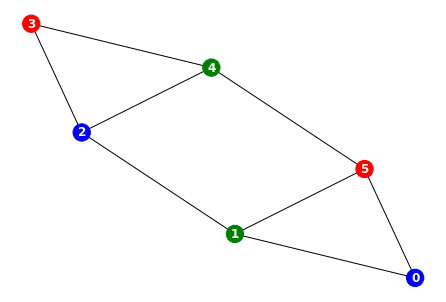

In [129]:
colorList = graphColoring(graph, colors)
drawColouredGraph(graph, colorList)